<a href="https://colab.research.google.com/github/Matiak/TOI/blob/main/TOI2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Druhy TOI projekt
# Autor sablony: Jan Beran, 2023
# Jmeno resitele/resitelky: Martin Babača
# xlogin:   xbabac02


# Zde si pripadne pridejte vlastni importy 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats # možná se vám bude hodit pro statistické testy


In [ ]:
t_avg = pd.read_csv("http://janberan.tech/wp-content/uploads/2023/02/T_avg.csv")
t_min = pd.read_csv("http://janberan.tech/wp-content/uploads/2023/02/T_min.csv")
t_max = pd.read_csv("http://janberan.tech/wp-content/uploads/2023/02/T_max.csv")
rain = pd.read_csv("http://janberan.tech/wp-content/uploads/2023/02/rain.csv")
wind = pd.read_csv("http://janberan.tech/wp-content/uploads/2023/02/wind.csv")
air = pd.read_csv("http://janberan.tech/wp-content/uploads/2023/02/Kvalita_ovzdusi___Air_quality.csv")

# Pokud by začaly odkazy výše vykazovat problémy s dostupností:
# 1) Stáhněte si zálohu dat z https://drive.google.com/drive/folders/12MjA3NTgHtssvzIPKFEEptwVTxOmhV1s?usp=sharing 
# 2) Nahrajte data do runtime
# 3) Změňte odkazy výše na lokální cesty
# 4) Opakujte pokaždé, když se resetuje runtime - otevření a zavření souboru atp.
# 5) Dejte mi vědět a já soubory nahraju někam jinam, abyste je nemuseli pokaždé ručně nahrávat do runtime

# Prostor pro váš kód

#Část 1: Deskriptivní analýza

Budete pracovat se soubory:
* **T_avg.csv**: průměrná teplota v ˚C
* **T_min.csv**: minimální teplota v ˚C
* **T_max.csv**: maximální teplota v ˚C
* **rain.csv**: úhrn srážek v mm
* **wind.csv**: rychlost větru v m/s
* **Kvalita_ovzduší___Air_quality.csv**: různá data, měřeno v µg/m³

  **no2_1h** : Hodnota NO2 - oxidu dusičitého, updatováno každou hodinu

  **pm10_1h**: Koncentrace polétavého prachu do 10um (pyl, standardní prach), updatováno jednou za hodinu
  
  **pm2_5_1h**: Koncentrace polétavého prachu do 2.5um (výfukové plyny, organické látky…) updatováno jednou za hodinu

Ve všech souborech kromě posledního je vždy jen jeden údaj. V posledním (soubor **Kvalita_ovzduší___Air_quality.csv**, data v proměnné **air**) je údajů opravdu velké množství, vy se ovšem zaměřte na měření označená jako no2_1h, pm10_1h a pm2_5_1h. Dávejte si přitom pozor, abyste vyfiltrovali opravdu jen relevantní data (tedy pro stanici Brno-Tuřany). V ostatních datasetech jsou data pouze z této stanice. Celkem tedy budete mít k dispozici 8 datasetů.

### Tabulka pro základní údaje o každém z osmi datasetů:
Ke každé tabulce navíc uveďte, jak budete daná data upravovat.

|Název charakteristiky | Hodnota
|----------------------|--------
|**Jméno datasetu**    |(např. "průměrná teplota" -- ta je uložena v souboru T_avg.csv)   
|**Rozsah a četnost** | od kdy do kdy a jak často probíhala měření
|**Maximum**           |
|**Minimum**           | 
|**Aritmetický průměr**|
|**Popis dat, co bude třeba upravit**         |Jsou data kompletní nebo některé hodnoty chybí? Jak bude třeba data upravit?

### Prostor pro vaše hypotézy:
Např: Domnívám se, že zde bude existovat vztah mezi datasety pm10_1h a pm2_5_1h, jelikož oba datasety určují množství polétavých částic. Pokud (např. v důsledku deště) poklesne hodnota jednoho údaje, měla by poklesnout i hodnota druhého údaje. 

t_avg
        date
0 1961-01-01
            date
23063 2022-12-31
       year  month  day  value       date
19335  2022      4   26    NaN 2022-04-26
20079  2022      4   27    NaN 2022-04-27
20823  2022      4   28    NaN 2022-04-28
21567  2022      4   29    NaN 2022-04-29
22311  2022      4   30    NaN 2022-04-30
23056  2022      5   31    NaN 2022-05-31
               year         month          day         value
count  22639.000000  22639.000000  22639.00000  22639.000000
mean    1991.492248      6.523654     15.72596      9.402343
min     1961.000000      1.000000      1.00000    -19.900000
max     2022.000000     12.000000     31.00000     30.800000


<Axes: ylabel='Frequency'>

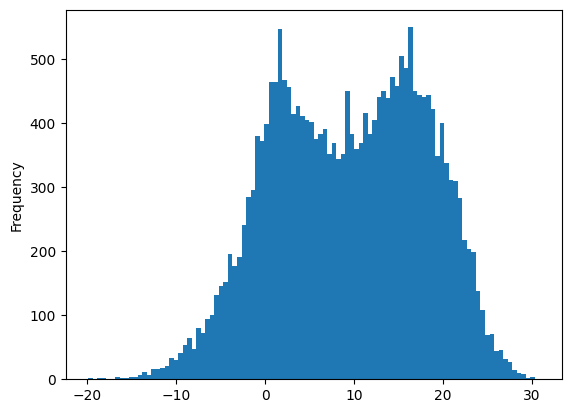

In [ ]:
print("t_avg")
tmp_df = pd.melt(t_avg,id_vars=['rok','měsíc'], var_name='deň',value_name='value')
tmp_df = tmp_df.rename(columns={"rok": "year", "měsíc": "month","deň":"day"})
tmp_df['day'] = tmp_df['day'].astype(int)
tmp_df['date'] = pd.to_datetime(tmp_df[['year','month','day']], errors='coerce')
tmp_df = tmp_df[pd.notnull(tmp_df['date'])]
print(tmp_df[['date']].sort_values('date', ascending = True).head(1))
print(tmp_df[['date']].sort_values(['date'], ascending = [False]).head(1))
print(tmp_df.loc[tmp_df.isna().any(axis=1)])
print(tmp_df.dropna().describe().loc[['count','mean','min','max']])
tmp_df['value'].plot.hist(bins=100)

### Dataset t_avg

|Názov charakteristiky | Hodnota
|----------------------|--------
| **Jméno datasetu**    | priemerná denná teplota \[˚C\]
|**Rozsah a četnost** | merané od 1. 1. 1961 do 31. 12. 2022, hodnota raz denne
|**Maximum**           | 30.8 ˚C
|**Minimum**           | -19.9 ˚C
|**Aritmetický průměr**| 9.402343 ˚C
|**Popis dat, co bude třeba upravit**         | Dáta sú rozdelené do 31 stĺpcov zodpovedajúcich dňom v mesiaci.<br>Je nutné tieto dáta trasformovať do jeného stĺpca a vytvoriť jeden stĺpec zodpovedajúci dátumu.<br>Ďalej odstránime neplatné dátumy a zostane 6 dátumov bez hodnoty.<br>Presnejšie chýbajú hodnoty pre interval 26-30.4.2022 a pre deň 31.5.2022.<br>Interval od poslednej známej, cez chýbajúce hodnoty po prvú známu hodnotu aproximujeme lineárnou funkciou. Teda osamotenú chýbajúcu hodnotu nahradíme priemerom okolitých známych hodnôt. Pre interval neznámych hodnôt platí, že priemer doplnených hodnôt je priemerom okolitých známych hodnôt a rozdiel medzi susednými hodnotami je konštantný.

t_min
        date
0 1961-01-01
            date
23063 2022-12-31
       year  month  day  value       date
19335  2022      4   26    NaN 2022-04-26
20079  2022      4   27    NaN 2022-04-27
20823  2022      4   28    NaN 2022-04-28
21567  2022      4   29    NaN 2022-04-29
22311  2022      4   30    NaN 2022-04-30
23056  2022      5   31    NaN 2022-05-31
               year         month          day         value
count  22639.000000  22639.000000  22639.00000  22639.000000
mean    1991.492248      6.523654     15.72596      9.402343
min     1961.000000      1.000000      1.00000    -19.900000
max     2022.000000     12.000000     31.00000     30.800000


<Axes: ylabel='Frequency'>

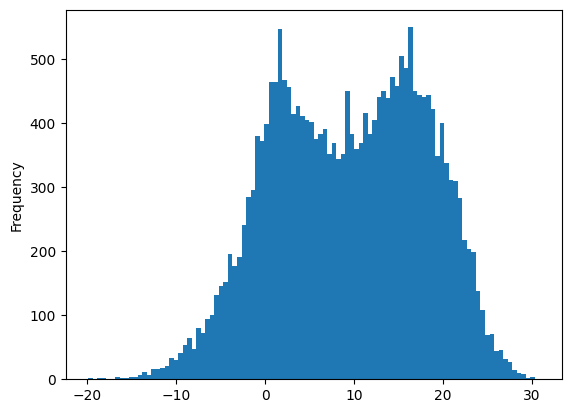

In [ ]:
print("t_min")
tmp_df = pd.melt(t_avg,id_vars=['rok','měsíc'], var_name='deň',value_name='value')
tmp_df = tmp_df.rename(columns={"rok": "year", "měsíc": "month","deň":"day"})
tmp_df['day'] = tmp_df['day'].astype(int)
tmp_df['date'] = pd.to_datetime(tmp_df[['year','month','day']], errors='coerce')
tmp_df = tmp_df[pd.notnull(tmp_df['date'])]
print(tmp_df[['date']].sort_values('date', ascending = True).head(1))
print(tmp_df[['date']].sort_values(['date'], ascending = [False]).head(1))
print(tmp_df.loc[tmp_df.isna().any(axis=1)])
print(tmp_df.dropna().describe().loc[['count','mean','min','max']])
tmp_df['value'].plot.hist(bins=100)

### Dataset t_min

|Názov charakteristiky | Hodnota
|----------------------|--------
| **Jméno datasetu**    | minimálna denná teplota \[˚C\]
|**Rozsah a četnost** | merané od 1. 1. 1961 do 31. 12. 2022, hodnota raz denne
|**Maximum**           | 24.2 ˚C
|**Minimum**           | -24.1 ˚C
|**Aritmetický průměr**| 5.027042 ˚C
|**Popis dat, co bude třeba upravit**         | Dáta sú rozdelené do 31 stĺpcov zodpovedajúcich dňom v mesiaci.<br>Je nutné tieto dáta trasformovať do jeného stĺpca a vytvoriť jeden stĺpec zodpovedajúci dátumu.<br>Ďalej odstránime neplatné dátumy a zostane 6 dátumov bez hodnoty.<br>Presnejšie chýbajú hodnoty pre interval 26-30.4.2022 a pre deň 31.5.2022.<br>Interval od poslednej známej, cez chýbajúce hodnoty po prvú známu hodnotu aproximujeme lineárnou funkciou. Teda osamotenú chýbajúcu hodnotu nahradíme priemerom okolitých známych hodnôt. Pre interval neznámych hodnôt platí, že priemer doplnených hodnôt je priemerom okolitých známych hodnôt a rozdiel medzi susednými hodnotami je konštantný.

t_max
        date
0 1961-01-01
            date
23063 2022-12-31
       year  month  day  value       date
19335  2022      4   26    NaN 2022-04-26
20079  2022      4   27    NaN 2022-04-27
20823  2022      4   28    NaN 2022-04-28
21567  2022      4   29    NaN 2022-04-29
22311  2022      4   30    NaN 2022-04-30
23056  2022      5   31    NaN 2022-05-31
               year         month          day         value
count  22639.000000  22639.000000  22639.00000  22639.000000
mean    1991.492248      6.523654     15.72596      9.402343
min     1961.000000      1.000000      1.00000    -19.900000
max     2022.000000     12.000000     31.00000     30.800000


<Axes: ylabel='Frequency'>

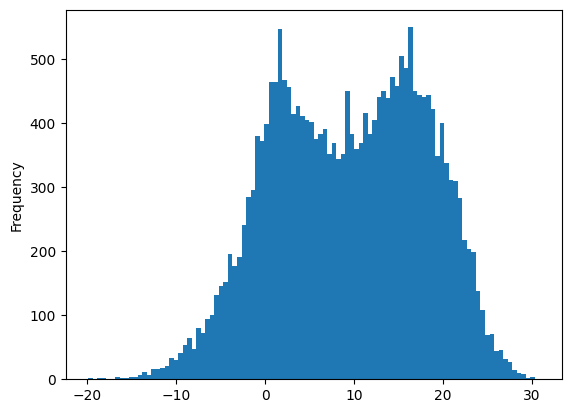

In [ ]:
print("t_max")
tmp_df = pd.melt(t_avg,id_vars=['rok','měsíc'], var_name='deň',value_name='value')
tmp_df = tmp_df.rename(columns={"rok": "year", "měsíc": "month","deň":"day"})
tmp_df['day'] = tmp_df['day'].astype(int)
tmp_df['date'] = pd.to_datetime(tmp_df[['year','month','day']], errors='coerce')
tmp_df = tmp_df[pd.notnull(tmp_df['date'])]
print(tmp_df[['date']].sort_values('date', ascending = True).head(1))
print(tmp_df[['date']].sort_values(['date'], ascending = [False]).head(1))
print(tmp_df.loc[tmp_df.isna().any(axis=1)])
print(tmp_df.dropna().describe().loc[['count','mean','min','max']])
tmp_df['value'].plot.hist(bins=100)

### Dataset t_max

|Názov charakteristiky | Hodnota
|----------------------|--------
| **Jméno datasetu**    | maximálna denná teplota \[˚C\]
|**Rozsah a četnost** | merané od 1. 1. 1961 do 31. 12. 2022, hodnota raz denne
|**Maximum**           | 37.8 ˚C
|**Minimum**           | -16.7 ˚C
|**Aritmetický průměr**| 13.924131 ˚C
|**Popis dat, co bude třeba upravit**         | Dáta sú rozdelené do 31 stĺpcov zodpovedajúcich dňom v mesiaci.<br>Je nutné tieto dáta trasformovať do jeného stĺpca a vytvoriť jeden stĺpec zodpovedajúci dátumu.<br>Ďalej odstránime neplatné dátumy a zostane 6 dátumov bez hodnoty.<br>Presnejšie chýbajú hodnoty pre interval 26-30.4.2022 a pre deň 31.5.2022.<br>Interval od poslednej známej, cez chýbajúce hodnoty po prvú známu hodnotu aproximujeme lineárnou funkciou. Teda osamotenú chýbajúcu hodnotu nahradíme priemerom okolitých známych hodnôt. Pre interval neznámych hodnôt platí, že priemer doplnených hodnôt je priemerom okolitých známych hodnôt a rozdiel medzi susednými hodnotami je konštantný.

rain
        date
0 1961-01-01
            date
23063 2022-12-31
       year  month  day  value       date
19335  2022      4   26    NaN 2022-04-26
20079  2022      4   27    NaN 2022-04-27
20821  2022      2   28    NaN 2022-02-28
20823  2022      4   28    NaN 2022-04-28
21567  2022      4   29    NaN 2022-04-29
22311  2022      4   30    NaN 2022-04-30
23056  2022      5   31    NaN 2022-05-31
             year         month           day         value
count  22638.0000  22638.000000  22638.000000  22638.000000
mean    1991.4909      6.523854     15.725417      1.373059
min     1961.0000      1.000000      1.000000      0.000000
max     2022.0000     12.000000     31.000000     82.100000


<Axes: ylabel='Frequency'>

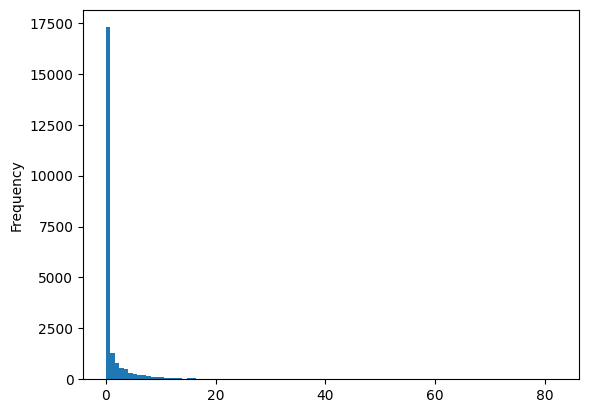

In [ ]:
print("rain")
tmp_df = pd.melt(rain,id_vars=['rok','měsíc'], var_name='deň',value_name='value')
tmp_df = tmp_df.rename(columns={"rok": "year", "měsíc": "month","deň":"day"})
tmp_df['day'] = tmp_df['day'].astype(int)
tmp_df['date'] = pd.to_datetime(tmp_df[['year','month','day']], errors='coerce')
tmp_df = tmp_df[pd.notnull(tmp_df['date'])]
print(tmp_df[['date']].sort_values('date', ascending = True).head(1))
print(tmp_df[['date']].sort_values(['date'], ascending = [False]).head(1))
print(tmp_df.loc[tmp_df.isna().any(axis=1)])
print(tmp_df.dropna().describe().loc[['count','mean','min','max']])
tmp_df['value'].plot.hist(bins=100)

### Dataset rain

|Názov charakteristiky | Hodnota
|----------------------|--------
| **Jméno datasetu**    | úhrn zrážok \[mm\]
|**Rozsah a četnost** | merané od 1. 1. 1961 do 31. 12. 2022, hodnota raz denne
|**Maximum**           | 82.1 ˚C
|**Minimum**           | 0.0 ˚C
|**Aritmetický průměr**| 1.373059 ˚C
|**Popis dat, co bude třeba upravit**         | Dáta sú rozdelené do 31 stĺpcov zodpovedajúcich dňom v mesiaci.<br>Je nutné tieto dáta trasformovať do jeného stĺpca a vytvoriť jeden stĺpec zodpovedajúci dátumu.<br>Ďalej odstránime neplatné dátumy a zostane 7 dátumov bez hodnoty.<br>Presnejšie chýbajú hodnoty pre interval 26-30.4.2022 a pre dni 28.2.2022 a 31.5.2022.<br>Interval od poslednej známej, cez chýbajúce hodnoty po prvú známu hodnotu aproximujeme lineárnou funkciou. Teda osamotenú chýbajúcu hodnotu nahradíme priemerom okolitých známych hodnôt. Pre interval neznámych hodnôt platí, že priemer doplnených hodnôt je priemerom okolitých známych hodnôt a rozdiel medzi susednými hodnotami je konštantný.

wind
        date
0 1961-01-01
            date
23063 2022-12-31
       year  month  day  value       date
19335  2022      4   26    NaN 2022-04-26
20079  2022      4   27    NaN 2022-04-27
20821  2022      2   28    NaN 2022-02-28
20823  2022      4   28    NaN 2022-04-28
21567  2022      4   29    NaN 2022-04-29
22311  2022      4   30    NaN 2022-04-30
23056  2022      5   31    NaN 2022-05-31
             year         month           day         value
count  22638.0000  22638.000000  22638.000000  22638.000000
mean    1991.4909      6.523854     15.725417      1.373059
min     1961.0000      1.000000      1.000000      0.000000
max     2022.0000     12.000000     31.000000     82.100000


<Axes: ylabel='Frequency'>

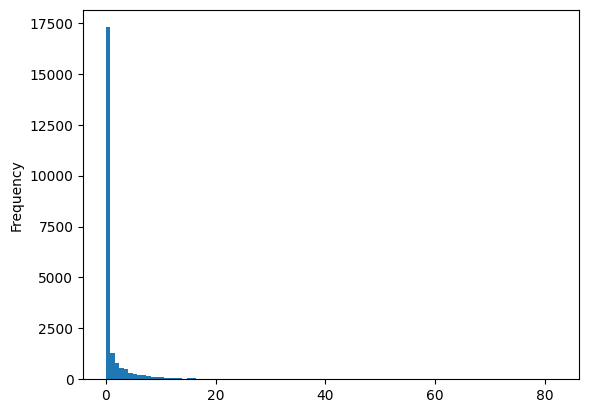

In [ ]:
print("wind")
tmp_df = pd.melt(rain,id_vars=['rok','měsíc'], var_name='deň',value_name='value')
tmp_df = tmp_df.rename(columns={"rok": "year", "měsíc": "month","deň":"day"})
tmp_df['day'] = tmp_df['day'].astype(int)
tmp_df['date'] = pd.to_datetime(tmp_df[['year','month','day']], errors='coerce')
tmp_df = tmp_df[pd.notnull(tmp_df['date'])]
print(tmp_df[['date']].sort_values('date', ascending = True).head(1))
print(tmp_df[['date']].sort_values(['date'], ascending = [False]).head(1))
print(tmp_df.loc[tmp_df.isna().any(axis=1)])
print(tmp_df.dropna().describe().loc[['count','mean','min','max']])
tmp_df['value'].plot.hist(bins=100)

### Dataset wind

|Názov charakteristiky | Hodnota
|----------------------|--------
| **Jméno datasetu**    | rýchlosť vetra \[m/s\]
|**Rozsah a četnost** | merané od 1. 1. 1961 do 31. 12. 2022, hodnota raz denne
|**Maximum**           | 17.3 ˚C
|**Minimum**           | 0.0 ˚C
|**Aritmetický průměr**| 3.472193 ˚C
|**Popis dat, co bude třeba upravit**         | Dáta sú rozdelené do 31 stĺpcov zodpovedajúcich dňom v mesiaci.<br>Je nutné tieto dáta trasformovať do jeného stĺpca a vytvoriť jeden stĺpec zodpovedajúci dátumu.<br>Ďalej odstránime neplatné dátumy a zostane 7 dátumov bez hodnoty.<br>Presnejšie chýbajú hodnoty pre interval 26-30.4.2022 a pre dni 30.8.2019 a 31.5.2022.<br>Interval od poslednej známej, cez chýbajúce hodnoty po prvú známu hodnotu aproximujeme lineárnou funkciou. Teda osamotenú chýbajúcu hodnotu nahradíme priemerom okolitých známych hodnôt. Pre interval neznámych hodnôt platí, že priemer doplnených hodnôt je priemerom okolitých známych hodnôt a rozdiel medzi susednými hodnotami je konštantný.

air
no2_1h
       objectid   code         name owner              actualized  no2_1h  \
29        51592  BBNYA  Brno-Tuřany  ČHMÚ  2022/02/09 15:37:45+00     NaN   
126       51689  BBNYA  Brno-Tuřany  ČHMÚ  2022/02/10 01:37:48+00     NaN   
154       51717  BBNYA  Brno-Tuřany  ČHMÚ  2022/02/10 04:37:51+00     NaN   
249       51812  BBNYA  Brno-Tuřany  ČHMÚ  2022/02/10 13:37:57+00     NaN   
474       52037  BBNYA  Brno-Tuřany  ČHMÚ  2022/02/11 12:38:11+00     NaN   
...         ...    ...          ...   ...                     ...     ...   
67323    118886  BBNYA  Brno-Tuřany  ČHMÚ  2023/02/05 23:43:25+00     NaN   
67537    119100  BBNYA  Brno-Tuřany  ČHMÚ  2023/02/06 22:43:27+00     NaN   
67729    119292  BBNYA  Brno-Tuřany  ČHMÚ  2023/02/07 21:43:29+00     NaN   
67927    119490  BBNYA  Brno-Tuřany  ČHMÚ  2023/02/08 20:43:56+00     NaN   
68040    119603  BBNYA  Brno-Tuřany  ČHMÚ  2023/02/09 12:43:56+00     NaN   

       pm10_1h  pm2_5_1h                                globalid

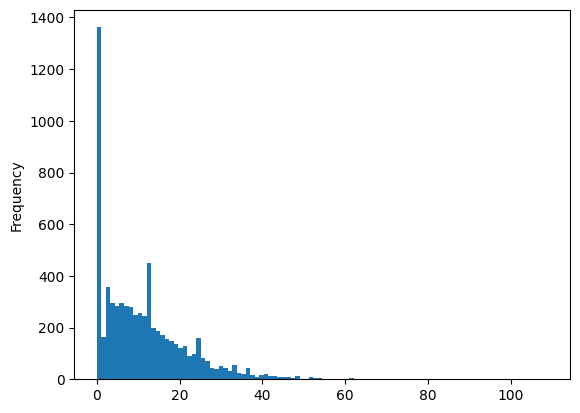

In [ ]:
print("air")
#print(air.head())
tmp_df = air[air['name']=='Brno-Tuřany']
del tmp_df['X']
del tmp_df['Y']
del tmp_df['lat']
del tmp_df['lon']
del tmp_df['so2_1h']
del tmp_df['co_8h']
del tmp_df['pm10_24h']
del tmp_df['o3_1h']
print("no2_1h")
print(tmp_df[tmp_df['no2_1h'].isna()])
print("pm10_1h")
print(tmp_df[tmp_df['pm10_1h'].isna()])
print("pm2_5_1h")
print(tmp_df[tmp_df['pm2_5_1h'].isna()])
print("no2_1h && pm10_1h")
print(tmp_df[tmp_df[['no2_1h','pm10_1h']].isna().all(axis=1)])
print("summary")
print(tmp_df.describe())
#tmp_df['no2_1h'].plot.hist(bins=100)
#tmp_df['pm10_1h'].plot.hist(bins=100)
tmp_df['pm2_5_1h'].plot.hist(bins=100)
print(tmp_df[['actualized']].sort_values('actualized', ascending = True).head(1))
print(tmp_df[['actualized']].sort_values(['actualized'], ascending = [False]).head(1))

## Dataset Kvalita_ovzduší___Air_quality.csv
### Dataset no2_1h

|Názov charakteristiky | Hodnota
|----------------------|--------
| **Jméno datasetu**    | Hodnota NO2
|**Rozsah a četnost** | merané od 9. 2. 2022 do 9. 2. 2023, hodnota raz za hodinu
|**Maximum**           | 75.8
|**Minimum**           | 1.0
|**Aritmetický průměr**| 13.054245
|**Popis dat, co bude třeba upravit**         | Dáta musia byť vytriedené len pre miesto Brno-Tuřany.<br>Dáta sú zaznamenávané po hodine a je nutné ich agregovať na jednu hodnotu denne aby bolo možné použiť ich v kombinácií s ostanými datasetmi.<br> Chýba 1421 záznamov, z čoho 1146 záznamov postráda aj údaj pm10_1h. Chýbajúce hodnoty môžu byť nahradené priemerom najbližsej platnej straršej a mladšej hodnoty.

### Dataset pm10_1h

|Názov charakteristiky | Hodnota
|----------------------|--------
| **Jméno datasetu**    | Koncentrácia polietavého prachu do 10um (peľ, štandardný prach)
|**Rozsah a četnost** | merané od 9. 2. 2022 do 9. 2. 2023, hodnota raz za hodinu
|**Maximum**           | 331.0
|**Minimum**           | 1.0
|**Aritmetický průměr**| 17.488028
|**Popis dat, co bude třeba upravit**         | Dáta musia byť vytriedené len pre miesto Brno-Tuřany.<br>Dáta sú zaznamenávané po hodine a je nutné ich agregovať na jednu hodnotu denne aby bolo možné použiť ich v kombinácií s ostanými datasetmi.<br> Chýba 1149 záznamov, z čoho 1146 záznamov postráda aj údaj no2_1h. Chýbajúce hodnoty môžu byť nahradené priemerom najbližsej platnej straršej a mladšej hodnoty.

### Dataset pm2_5_1h

|Názov charakteristiky | Hodnota
|----------------------|--------
| **Jméno datasetu**    | Koncentrácia polietavého prachu do 2.5um (výfukové plyny, organické látky …)
|**Rozsah a četnost** | merané od 9. 2. 2022 do 9. 2. 2023, hodnota raz za hodinu
|**Maximum**           | 109.0
|**Minimum**           | 0.0
|**Aritmetický průměr**| 11.255967
|**Popis dat, co bude třeba upravit**         | Dáta musia byť vytriedené len pre miesto Brno-Tuřany.<br>Dáta sú zaznamenávané po hodine a je nutné ich agregovať na jednu hodnotu denne aby bolo možné použiť ich v kombinácií s ostanými datasetmi.<br>Nenašli sa žiadne chýbajúce hodnoty ale pravdepodobné, že údaj 0.0 nie je validný, preto bude považovaný za chýbajúcu hodnotu.

## Hypotézy:
"Minimálna teplota je nepriamo závislá na rýchlosti vetra."<br>
Ak fúka vietor, potom býva chladnejšie.
<br><br>
"Množstvo zrážok je nepriamo závislé na teplote."<br>
Ak prší je zamračené, teda nesvieti slnko a je teda chladnejšie.
<br><br>
"Rýchlosť vetra je priamo závislá na množstve zrážok."<br>
Zrážky sú spojené s vetrom.
<br><br>
"Priemerná teplota je závislá na maximálnej teplote."<br>
Asi nie je potrebný žiaden komentár. Hypotéza je formulovaná ako ukážka hypotézy s jasnou silnou závislosťou.

# Část 2: Příprava dat

V této části realizujete úpravu dat, kterou jste si navrhli v předchozí části. Detailní zadání je k dispozici v souboru se zadáním. Pracujte efektivně, využívejte, co vám Python a  jeho knihovny nabízejí.

Nezapomeňte zodpovědět otázky ze zadání: Jak jste doplňovali chybějící data, jaký rozsah a četnost jste zvolili a jak jste data upravili. 

In [ ]:
ins = [t_avg,t_min,t_max,rain,wind]
# new dataframes
dfs = [[],[],[],[],[]]
df_air = []
# same conversions for datasets average, max, min temperatur, wind speed and amount of rain
# 1. create columns day and value
# 2. rename columns rok, měsíc to year, month
# 3. create column date
# 4. remove unnecessary columns
# 5. set index to date
# 6. interpolation of empty values
# 7. trim datasets to interval 
for i in range(5):
  dfs[i] = pd.melt(ins[i],id_vars=['rok','měsíc'], var_name='deň',value_name='value')
  dfs[i] = dfs[i].rename(columns={"rok": "year", "měsíc": "month","deň":"day"})
  dfs[i]['date'] = pd.to_datetime(dfs[i][['year','month','day']], errors='coerce')
  dfs[i] = dfs[i][pd.notnull(dfs[i]['date'])]
  del dfs[i]['year']
  del dfs[i]['month']
  del dfs[i]['day']
  dfs[i] = dfs[i].sort_values('date', ascending = True)
  dfs[i] = dfs[i].set_index('date')
  dfs[i].interpolate(inplace=True)
  dfs[i] = dfs[i]['2022-02-10':'2022-12-30']

# new dataframe for air quality dataset
df_t_avg,df_t_max,df_t_min,df_rain,df_wind = dfs
# preprocessing of air quality dataset
# 1. choose values from Brno-Tuřany
# 2. removing zero values of pm2_5_1h column
# 3. set index as date column created by cast of actualized to datetime
# 4. interpolation of empty values
# 5. remove of unnecessary columns
# 6. agregation of values into dayli means
# 7. trim datasets to interval 
# 8. remove of unnecessary values (columns of values)
df_air = air[air['name']=='Brno-Tuřany']
df_air['pm2_5_1h'] = df_air['pm2_5_1h'].replace(0.0,np.NaN)
df_air['date'] = pd.to_datetime(df_air['actualized'])
df_air = df_air.sort_values('date', ascending = True)
df_air = df_air.set_index('date')
df_air.interpolate(inplace=True)
df_air = df_air['2022-02-10':'2022-12-30']
del df_air['X']
del df_air['Y']
del df_air['lat']
del df_air['lon']
del df_air['so2_1h']
del df_air['co_8h']
del df_air['pm10_24h']
del df_air['o3_1h']
del df_air['objectid']
del df_air['code']
del df_air['name']
del df_air['owner']
del df_air['globalid']
del df_air['actualized']
df_air = df_air.resample("D").mean()
df_air = df_air.tz_localize(None)
df_air.interpolate(inplace=True)

<ipython-input-53-e365a137030d>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_air['pm2_5_1h'] = df_air['pm2_5_1h'].replace(0.0,np.NaN)
<ipython-input-53-e365a137030d>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_air['date'] = pd.to_datetime(df_air['actualized'])


# Část 3: Analýza dat 

V této části budete anaylzovat své časové řady. Není zde připravena žádná šablona, jelikož každý můžete používat rozdílné struktury uložení dat - a různé postupy - které povedou ke sprévnému výsledku.

V souboru se zadáním je ovšem zmíněno několik funkcí, které vám mohou pomoci. 

Stručné zadání:
Pro dvojice dat, pro které jste zformulovali hypotézy v části 1, a pro 3 libovolně zvolené jiné dvojice časových řad (jiné než ty, pro které jste formulovali hypotézy a nikoli dvě sady teplotních údajů) zjistěte:
1) Kovarianci
2) Pearsonův korelační koeficient
3) Statistickou významnost koeficientu

In [ ]:
def covariance(x, y):
  return x.cov(y)

def pCorelCoefAndSig(x,y):
  return stats.pearsonr(x,y)

def analyze(x,y,xName,yName):
  cov = covariance(x,y)
  r,p = pCorelCoefAndSig(x,y)
  print("Vzťah",xName,"a",yName)
  print("Kovariancia","=",cov)
  if(abs(cov)<0.3):
    print("Nevýznamná závislosť.")
  elif(cov<0):
    print("Nepriama závislosť.")
  else:
    print("Priama závislosť.")

  print("Pearsnov korelačný koeficient")
  print("r","=",r)
  print("p","=",p)
  print("Odhad významnosti závislosti:")
  if(abs(r)<0.1):
    print("Žiadna ",end="")
  elif(abs(r)<0.3):
    print("Málo významná ",end="")
  elif(abs(r)<0.5):
    print("Stredne významná ",end="")
  else:
    print("Silne významná ",end="")

  if(abs(r)<0.1):
    print("závislosť.")
  elif(r > 0):
    print("priama lineárna závislosť.")
  else:
    print("nepriama lineárna závislosť.")

  print("Významnosť závislosti:")
  if(p<0.05):
    if(r> 0):
      print("Významná priama lineárna závislosť.")
    else:
      print("Významná nepriama lineárna závislosť.")
  else:
    if(r> 0):
      print("Nevýznamná závislosť.")
    else:
      print("Nevýznamná závislosť.")
  print()
  print()

analyze(df_wind["value"],df_t_min["value"],"Rýchlosť vetra","Minimálna teplota")
analyze(df_t_min["value"],df_rain["value"],"Minimálna teplota","Množstvo zrážok")
analyze(df_rain["value"],df_wind["value"],"Množstvo zrážok","Rýchlosť vetra")
analyze(df_t_max["value"],df_t_avg["value"],"Maximálna teplota","Priemerná teplota")


analyze(df_rain["value"],df_air["pm10_1h"],"Množstvo zrážok","Množstvo polietavého prachu do 10um (peľ, štandardný prach)")
analyze(df_wind["value"],df_air["no2_1h"],"Rýchlosť vetra","Koncentrácia NO2")
analyze(df_rain["value"],df_air["no2_1h"],"Množstvo zrážok","Koncentrácia NO2")
analyze(df_air["no2_1h"],df_air["pm10_1h"],"Koncentrácia NO2","Množstvo polietavého prachu do 10um (peľ, štandardný prach)")

Vzťah Rýchlosť vetra a Minimálna teplota
Kovariancia = -1.2783887551121804
Nepriama závislosť.
Pearsnov korelačný koeficient
r = -0.11782847290945557
p = 0.03399710741619898
Odhad významnosti závislosti:
Málo významná nepriama lineárna závislosť.
Významnosť závislosti:
Významná nepriama lineárna závislosť.


Vzťah Minimálna teplota a Množstvo zrážok
Kovariancia = 2.8366318847227014
Priama závislosť.
Pearsnov korelačný koeficient
r = 0.07868609401667748
p = 0.1576358972347298
Odhad významnosti závislosti:
Žiadna závislosť.
Významnosť závislosti:
Nevýznamná závislosť.


Vzťah Množstvo zrážok a Rýchlosť vetra
Kovariancia = 0.5793156365860183
Priama závislosť.
Pearsnov korelačný koeficient
r = 0.11795957808126889
p = 0.03379731694320528
Odhad významnosti závislosti:
Málo významná priama lineárna závislosť.
Významnosť závislosti:
Významná priama lineárna závislosť.


Vzťah Maximálna teplota a Priemerná teplota
Kovariancia = 51.78719828574704
Priama závislosť.
Pearsnov korelačný koeficient
r

## Část 4: Diskuze

Níže uveďte požadované údaje tak, jak jsou popsány v souboru se zadáním.

Hodnoty spojené s testami sú uvedené prehľadne vo výstupe predchádzajúcej bunky.
Nižšie uvediem len komentár k dosiahnutým výsledkom:<br>

## Hypotézy
Vzťah Rýchlosť vetra a Minimálna teplota<br>
Potvrdila sa nepriama závislosť medzi sledovanými veličinami. Príčiny boli konštatované pri vyslovení hypotézy.
<br><br>
Vzťah Minimálna teplota a Množstvo zrážok<br>
Žiadna závislosť sa nepotvrdila. Pri vyslovení hypotézy bola použitá argumentácia:<br>
Ak prší je zamračené, teda nesvieti slnko a je teda chladnejšie.<br>
Túto argumentáciu je možné napadnúť, pretože počas zimných mesiacov platí opačný jav, teda pri jasnom počasí. Celkovo teda môžeme povedať, že je pochopiteľné, že v priemere za celý rok neexistuje žiaden významný vzťah.<br><br>


Vzťah Množstvo zrážok a Rýchlosť vetra<br>
Potvrdila sa nepriama závislosť medzi sledovanými veličinami. Príčiny boli konštatované pri vyslovení hypotézy.
<br><br>


Vzťah Maximálna teplota a Priemerná teplota<br>
Potvrdila sa silná priama závislosť medzi sledovanými veličinami. Príčiny boli konštatované pri vyslovení hypotézy.
<br><br>

## Náhodné porovnania
Vzťah Množstvo zrážok a Množstvo polietavého prachu do 10um (peľ, štandardný prach)<br>
Potvrdila sa nepriama závislosť medzi sledovanými veličinami.
Možnou príčinou by môhol byť fakt, že počas dažďa kvapky padajúce na zem skrz vzduch pohlcujú častice vo vzduchu rozptýlené a tak znižujú ich koncentráciu.
<br><br>
Vzťah Rýchlosť vetra a Koncentrácia NO2<br>
Potvrdila sa nepriama závislosť medzi sledovanými veličinami.
Možnou príčinou by môhol byť zdroj NO2 v blízkosti meracej stanice a relatívne slabé zdroje vo väčšej vzdialenosti od meracej stanice. V takomto prípade sa koncentrácia NO2 pri silnejšom vetre rozptýli po okolí, teda v okolí meracej stanice sa zníži.
<br><br>
Vzťah Množstvo zrážok a Koncentrácia NO2<br>
Potvrdila sa nepriama závislosť medzi sledovanými veličinami.
Možnou príčinou by môhol byť fakt, že NO2 je pohlcované kvapalinami (a sliznicami) a teda dážď viaže NO2 zo vzduchu a tak znižuje koncentráciu NO2.
NO2 je jednou zo zložiek tzv. kyslých dažďov.
<br><br>


Vzťah Koncentrácia NO2 a Množstvo polietavého prachu do 10um (peľ, štandardný prach)<br>
Potvrdila sa nepriama závislosť medzi sledovanými veličinami.
Vyššie bolo uvedené, že koncentrácia NO2 aj množstvo polietavého prachu do 10um sú nepriamo závislé na množstve zrážok. Z toho vyplýva, že sú obe veličiny priamo závislé jedna od druhej.
Je možné konštatovať, že okrem zrážok, ktoré viažu rovnako NO2 aj prachové častice, rovnako aj vzdučné prúdenie obdobne rozptyluje ako NO2, tak aj prachové častice. Môžeme teda tvrdiť, že koncentrácia NO2 by mala byť priamo závislá na množstve polietavého prachu do 10um.

## (Část 5: Zpětná vazba)

Projekt formou jupyter notebooku je zaujímavejšia voľba ako jednoduché pokyny formou "dáta tu: url, vypracujte analýzu", čo sa stáva v prípade niektorých iných projektov na FITe. Oceňujem tiež presné a explicitné zadanie, ktoré nevyžadovalo sledovanie niekoľkých informačných kanálov len preto, aby som splnil "zadanie".

Tiež som sa vďaka projektu zoznámil s colabom (zatiaľ najlepší a najjednoduchší spôsob prezentácie ipynb súborov) a dúfam, že zvládnem úspešne odovzdať projekt podľa pokynov.